# Introducción a PyTorch

<center><img src="https://upload.wikimedia.org/wikipedia/commons/c/c6/PyTorch_logo_black.svg"></center>

[PyTorch](https://pytorch.org/) es una biblioteca de computación científica. Está desarrollada en C++ y Python, pero está diseñada para ser usada en Python.

Fundamentalmente PyTorch se basa en dos pilares fundamentales:

* Los tensores: una estructura de datos similar al array de NumPy.
* El cálculo de derivadas automatizado. Este aspecto es fundamental para la optimiaación de modelos.



# Inicialización de PyTorch

Para empezar es necesario importar el paquete. Luego se puede verificar qué versión está instalada

In [2]:
import torch
torch.version.__version__

'1.8.0+cu101'

Pytorch permite la ejecución de la mayoría de las operaciones directamente sobre la GPU. Por tanto, es importante verificar si se dispone de soporte para la GPU. En caso de que no aparezca que Cuda está disponible se deberá cambiar el tipo del runtime del notebook.

In [3]:
torch.cuda.is_available()

True

Un tensor no es más que un conjunto de números organizados en varias dimensiones. Un tensor puede ser:

* Un escalar: un único número.
* Un array: una lista de números consecutivos que se pueden acceder mediante un índice que indica la posición que ocupan.
* Una matriz. Lo mismo que antes pero en dos dimensiones.
* Un array multidimensional. La extensión del caso anterior a n dimensiones.

# Creación de un tensor



## Creación a partir de listas 

In [4]:
x = [1, 2, 3, 4, 5, 6]
t = torch.tensor(x)
type(t)

torch.Tensor

También se puede hacer el proceso contrario.

In [5]:
x = t.tolist()
type(x)

list

Un tensor puede contner un solo número. En ese caso se puede acceder de la siguiente forma.

In [6]:
x = torch.tensor([10])
x.item()

10

## Creación a partir de NumPy

In [7]:
import numpy as np
y = np.array([1,2,3,4,5])
type(y)

numpy.ndarray

In [8]:
t = torch.tensor(y)
t

tensor([1, 2, 3, 4, 5])

La creación de un tensor realiza una copia de los datos. También es posible realizar una creación sin copia.

In [9]:
t = torch.from_numpy(y)
type(t)

torch.Tensor

En este caso, la modificación de los datos originales también modifican el tensor.

In [10]:
y[0]=100
t

tensor([100,   2,   3,   4,   5])

En dirección contraria también es posible.

In [11]:
y = t.numpy()
type(y)

numpy.ndarray

## Creación directa

Existen además muchas maneras de crearlos directamene. A continuación de muestran alugunos ejemplo.

In [12]:
a = torch.ones(5)
print(f'{a}')
print(f'Shape: {a.shape}')

tensor([1., 1., 1., 1., 1.])
Shape: torch.Size([5])


In [13]:
a = torch.ones(3,3)
print(f'{a}')
print(f'Shape: {a.shape}')

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
Shape: torch.Size([3, 3])


In [14]:
a = torch.zeros(3,4,5)
print(f'{a}')
print(f'Shape: {a.shape}')

tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]])
Shape: torch.Size([3, 4, 5])


In [15]:
a = torch.linspace(10,20,5)
print(f'{a}')
print(f'Shape: {a.shape}')

tensor([10.0000, 12.5000, 15.0000, 17.5000, 20.0000])
Shape: torch.Size([5])


# Indexado

La forma de acceder a los elementos de un tensor es igual que en NumPy. A continuacón se muestran unos ejemplo.

In [64]:
t = torch.tensor([[1, 2, 3], [4, 5, 6]])
t

tensor([[1, 2, 3],
        [4, 5, 6]])

El primer elemento.

In [65]:
t[0,0]

tensor(1)

El último elemento.

In [66]:
t[-1,-1]

tensor(6)

Todos los elementos de la primera file.

In [67]:
t[0,:]

tensor([1, 2, 3])

Todos los elementos de la primera columna.

In [68]:
t[:,0]

tensor([1, 4])

Elementos de todas las filas y de las dos primeras columnas.

In [69]:
t[:,0:2]

tensor([[1, 2],
        [4, 5]])

# Tipos de datos

Generalmente un tensor contiene datos reales. En concreto números reales representados en coma flotante con 32 bits. Sin embargo, existe la posibilidad de usar otro tipo de datos.

In [22]:
t = torch.rand(2,3)
t

tensor([[0.5179, 0.7907, 0.3180],
        [0.6458, 0.8915, 0.8837]])

In [23]:
t.dtype

torch.float32

Cuando se crea se puede especificar el tipo:


In [24]:
t = torch.ones(10, 2, dtype=torch.int8)
t

tensor([[1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1]], dtype=torch.int8)

In [25]:
t.dtype

torch.int8

Como se puede observar en la [documentación](https://pytorch.org/docs/stable/tensors.html) hay muchos tipos de datos disponibles

# Operaciones con tensores

En PyTorch se puede realizar una gran cantidad de operaciones con los tensores. A continuación se muestran algunos ejemplos.

In [26]:
t = torch.rand(10)
t

tensor([0.6056, 0.1823, 0.2101, 0.2050, 0.8614, 0.8762, 0.0360, 0.0866, 0.4820,
        0.8779])

Cálculo del seno para cada elemento.

In [27]:
torch.sin(t)

tensor([0.5693, 0.1812, 0.2085, 0.2036, 0.7588, 0.7683, 0.0360, 0.0865, 0.4635,
        0.7694])

Sería equivalente a realizar

In [28]:
t.sin()

tensor([0.5693, 0.1812, 0.2085, 0.2036, 0.7588, 0.7683, 0.0360, 0.0865, 0.4635,
        0.7694])

De forma general las operaciones se pueden dividir en grupos:


*   Creación
*   Indexado
* Operaciones matemáticas
  *   Aplicadas a cada elemento (sin)
  *   De reducción (mean)
  *   Entre tensores
* Muestreo
* Serialización
* Paralelismo



In [29]:
t1 = torch.ones(2,2)
t2 = torch.ones(2,2)
t2 = t2*10
t1 + t2

tensor([[11., 11.],
        [11., 11.]])

Que sería equivalente a

In [30]:
torch.add(t1, t2)

tensor([[11., 11.],
        [11., 11.]])

# Reorganizar

Un tensor tiene una estructura organizada en dimensiones. Existen formas de realizar cambios.

In [93]:
t = torch.ones(4,4)
t[2,2] = 99
t

tensor([[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1., 99.,  1.],
        [ 1.,  1.,  1.,  1.]])

In [94]:
t = torch.reshape(t, (2, 8))
t

tensor([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1., 99.,  1.,  1.,  1.,  1.,  1.]])

In [95]:
t = torch.reshape(t, (2, 2, 4))
t

tensor([[[ 1.,  1.,  1.,  1.],
         [ 1.,  1.,  1.,  1.]],

        [[ 1.,  1., 99.,  1.],
         [ 1.,  1.,  1.,  1.]]])

Se puede observar que los datos se mantiene, solo cambia la organización

Una opción rápida para convertir en un vector

In [116]:
t = t.flatten()
t

tensor([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 99.,  1.,  1.,  1.,
         1.,  1.])

Para añadir dimensiones

In [120]:
t=torch.unsqueeze(t,0)
print(t)
print(t.shape)
t=torch.unsqueeze(t,0)
print(t)
print(t.shape)

tensor([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 99.,  1.,  1.,  1.,
          1.,  1.]])
torch.Size([1, 16])
tensor([[[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 99.,  1.,  1.,  1.,
           1.,  1.]]])
torch.Size([1, 1, 16])


Para quitar dimensiones de tamaño 1

In [121]:
t = t.squeeze()
print(t)
print(t.shape)
?torch.squeeze

tensor([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 99.,  1.,  1.,  1.,
         1.,  1.])
torch.Size([16])


Otro ejemplo para cambiar filas por columnas

In [134]:
t = torch.arange(0,10)
t = torch.reshape(t, (2,5))
print(t)
t = t.t()
print(t)

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])
tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]])


Para cambiar las dimensiones

In [145]:
t = torch.arange(0,24).reshape(4,3,2)
print(t)
print(t.shape)
t = t.permute(2,1,0)
print(t)
print(t.shape)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]],

        [[18, 19],
         [20, 21],
         [22, 23]]])
torch.Size([4, 3, 2])
tensor([[[ 0,  6, 12, 18],
         [ 2,  8, 14, 20],
         [ 4, 10, 16, 22]],

        [[ 1,  7, 13, 19],
         [ 3,  9, 15, 21],
         [ 5, 11, 17, 23]]])
torch.Size([2, 3, 4])


# Moviendo tensores a la GPU

Por defecto un tensor se almacena en la memoria principal y sus operaciones las realiza la CPU. Sin embargo, se pueden transferir a la GPU para que sus operaciones se realicen más rápido.

In [31]:
t = torch.tensor([1,2,3])
t.device

device(type='cpu')

In [32]:
t = t.to(device='cuda')
t

tensor([1, 2, 3], device='cuda:0')

La forma de realizar las operaciones es transparente.

In [33]:
torch.sin(t)

tensor([0.8415, 0.9093, 0.1411], device='cuda:0')

El tensor se puede mover a la CPU.

In [34]:
t = t.to(device='cpu')
t

tensor([1, 2, 3])

La única restricción que existe es que los tensores con los que se operan deben estar en el mismo dispositivo.

In [35]:
t1 = torch.tensor([1,1,1], device='cuda')
t2 = torch.tensor([2,2,2], device='cuda')
t1 + t2

tensor([3, 3, 3], device='cuda:0')

In [36]:
t3 = torch.tensor([3,3,3])
# esta operación genera error
# t2 + t3

# Serialización

Un tensor se puede guardar en disco para luego recuperar su valor.

In [37]:
t = torch.rand(4,4)
t

tensor([[0.7836, 0.5820, 0.7898, 0.9595],
        [0.5187, 0.5078, 0.9829, 0.0546],
        [0.4621, 0.0908, 0.3436, 0.2260],
        [0.6735, 0.4918, 0.9622, 0.8023]])

In [38]:
t[0,0] = -999
torch.save(t, 't.pt')

In [39]:
!ls *.pt

t.pt


In [40]:
t2 = torch.load('t.pt')
t2

tensor([[-9.9900e+02,  5.8205e-01,  7.8976e-01,  9.5950e-01],
        [ 5.1873e-01,  5.0779e-01,  9.8291e-01,  5.4577e-02],
        [ 4.6208e-01,  9.0809e-02,  3.4362e-01,  2.2603e-01],
        [ 6.7353e-01,  4.9180e-01,  9.6220e-01,  8.0235e-01]])

# Representación gráfica

El contenido de un tensor se puede representar gráficamente de forma directa.

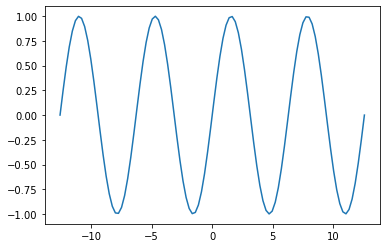

In [41]:
import matplotlib.pyplot as plt
import math
x = torch.linspace(-4*math.pi, 4*math.pi, 100)
y = torch.sin(x)
plt.plot(x,y)

Otro ejemplo.

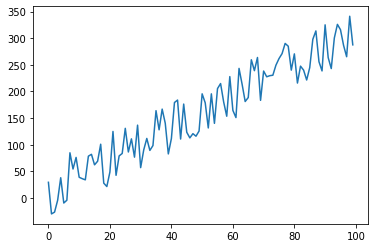

In [42]:
x = torch.tensor(range(100))
y = 3*x + 14
y = y + 100*(torch.rand(x.shape[0]) - 0.5)
plt.plot(x,y)

También se pueden visualizar matrices como imágenes.

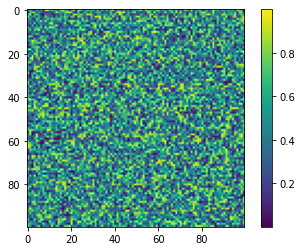

In [43]:
img = torch.rand(100,100)
plt.imshow(img)
plt.colorbar()

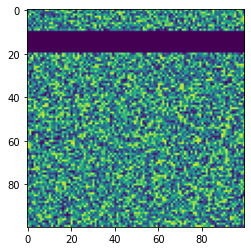

In [44]:
img[10:20,:]=0
plt.imshow(img)

# Comparación de cálculos entre CPU y GPU

Para entender la necesidad de Pytorch para añadir una nueva estructura de datos se va a realizar una comparación entre las operaciones realizadas por la CPU y por la GPU. 

Se declaran dos matrices y se multiplica (operador @), tanto en la CPU como en la GPU.

In [45]:
a = torch.rand(5, 5)
b = torch.rand(5, 5)
r_cpu = a @ b
a = a.to('cuda')
b = b.to('cuda')
r_gpu = a @ b

La diferencia es despreciable.

In [46]:
dif = r_cpu - r_gpu.to('cpu')
dif.sum()

tensor(-2.9802e-07)

Ahora se crean dos matrices de tamaño K. En este caso de 3000.

In [47]:
K = 3000;
m1 = torch.rand(K, K)
m2 = torch.rand(K, K)

Se mide cuanto tiempo se tarda en ejecutar la multiplicación.

In [48]:
%timeit -n1 -o m1 @ m2

1 loop, best of 5: 673 ms per loop


<TimeitResult : 1 loop, best of 5: 673 ms per loop>

Se guarda en una variable.

In [49]:
cpu_time = _
cpu_time.all_runs

[0.7453809619999987,
 0.706482168000008,
 0.672704189000001,
 0.6739430890000051,
 0.6935457430000014]

Ahora se realiza el mismo proceso en la GPU.

In [50]:
m1 = torch.rand(K, K)
m2 = torch.rand(K, K)
m1 = m1.to('cuda')
m2 = m2.to('cuda')

In [51]:
%timeit -n1 -o m1 @ m2

The slowest run took 32.00 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 18 µs per loop


<TimeitResult : 1 loop, best of 5: 18 µs per loop>

In [52]:
gpu_time = _

Se guarda el peor tiempo para evitar problemas de cacheos.

In [53]:
cpu_time_tensor = torch.tensor(cpu_time.all_runs)
cpu_time_max = cpu_time_tensor.max()
gpu_time_tensor = torch.tensor(gpu_time.all_runs)
gpu_time_max = gpu_time_tensor.max()

Se representa gráficamente.

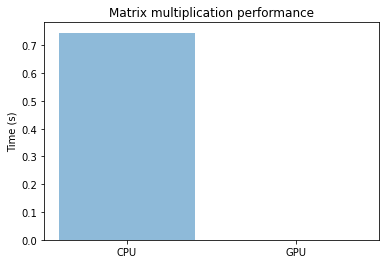

CPU: 0.7453809380531311 seconds
GPU: 0.0005773709854111075 seconds


In [54]:
import matplotlib.pyplot as plt
objects = ('CPU', 'GPU')
pos = range(len(objects))
performance = [cpu_time_max,gpu_time_max]

y=plt.bar(pos, performance, align='center', alpha=0.5)
plt.xticks(pos, objects)
plt.ylabel('Time (s)')
plt.title('Matrix multiplication performance')

plt.show()

print(f"CPU: {cpu_time_max} seconds")
print(f"GPU: {gpu_time_max} seconds")

# Comparación de cálculos entre NumPy y PyTorch

Ahora se van a comparar los tiempos respecto a NumPy.

In [55]:
import numpy as np
rg = np.random.default_rng(1)
m3 = rg.random((K,K))
m4 = rg.random((K,K))


In [56]:
%timeit -n1 -o m3 @ m4

1 loop, best of 5: 1.38 s per loop


<TimeitResult : 1 loop, best of 5: 1.38 s per loop>

In [57]:
np_time = _

In [58]:
np_time_tensor = torch.tensor(np_time.all_runs)
np_time_max = np_time_tensor.max()
np_time_max

tensor(1.4713)

In [59]:
m1 = torch.from_numpy(m3)
m2 = torch.from_numpy(m4)
m1 = m1.to('cuda')
m2 = m2.to('cuda')

In [60]:
%timeit -n1 -o m1 @ m2

The slowest run took 46.84 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 11.6 µs per loop


<TimeitResult : 1 loop, best of 5: 11.6 µs per loop>

In [61]:
gpu_time = _
gpu_time.all_runs

[0.0005423550000074329,
 4.7793000007345654e-05,
 1.4637000006700873e-05,
 1.1579999991795376e-05,
 1.1614000001713976e-05]

In [62]:
gpu_time_tensor = torch.tensor(gpu_time.all_runs)
gpu_time_max = gpu_time_tensor.max()

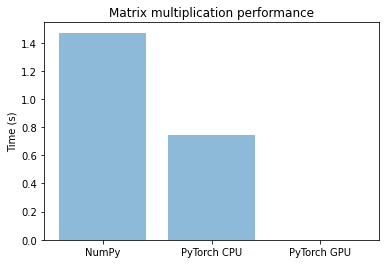

NumPy CPU: 1.4712892770767212 seconds
PyTorch CPU: 0.7453809380531311 seconds
PyTorch GPU: 0.000542355002835393 seconds


In [63]:
objects = ('NumPy', 'PyTorch CPU', 'PyTorch GPU')
pos = range(len(objects))
performance = [np_time_max,cpu_time_max,gpu_time_max]

y=plt.bar(pos, performance, align='center', alpha=0.5)
plt.xticks(pos, objects)
plt.ylabel('Time (s)')
plt.title('Matrix multiplication performance')

plt.show()

print(f"NumPy CPU: {np_time_max} seconds")
print(f"PyTorch CPU: {cpu_time_max} seconds")
print(f"PyTorch GPU: {gpu_time_max} seconds")